In [36]:
from fredpy import series, window_equalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
%matplotlib inline

In [90]:
y1m= series('DTB4WK')
y3m= series('DTB3')
y6m= series('DTB6')
y1 = series('DGS1')
y5 = series('DGS5')
y10= series('DGS10')
y20= series('DGS20')
y30= series('DGS30')

window_equalize([y1m,y3m,y6m,y1,y5,y10,y20,y30])

win = [str(int(y3m.dates[-1][:4])-2)+y3m.dates[-1][4:],'2500-01-01']
for y in [y1m,y3m,y6m,y1,y5,y10,y20,y30]:
    y.window(win)
    


y1m = pd.DataFrame(y1m.data,index = y1m.datenumbers,columns=['1 mo'])
y3m = pd.DataFrame(y3m.data,index = y3m.datenumbers,columns=['3 mo'])
y6m = pd.DataFrame(y6m.data,index = y6m.datenumbers,columns=['6 mo'])
y1 = pd.DataFrame(y1.data,index = y1.datenumbers,columns=['1 yr'])
y5 = pd.DataFrame(y5.data,index = y5.datenumbers,columns=['5 yr'])
y10 = pd.DataFrame(y10.data,index = y10.datenumbers,columns=['10 yr'])
y20 = pd.DataFrame(y20.data,index = y20.datenumbers,columns=['20 yr'])
y30 = pd.DataFrame(y30.data,index = y30.datenumbers,columns=['30 yr'])

yields = pd.concat([y1m,y3m,y6m,y1,y5,y10,y20,y30],axis=1)
yields = yields.dropna(thresh=1)
N = len(yields.index)

In [91]:
# Make a user-defined colormap.
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])

# Make a normalizer that will map the time values from [start_time,end_time+1] -> [0,1].
cnorm = mcol.Normalize(vmin=0,vmax=N)

# Turn these into an object that can be used to map time values to colors and can be passed to plt.colorbar().
cpick = cm.ScalarMappable(norm=cnorm,cmap=cm1)
cpick.set_array([])

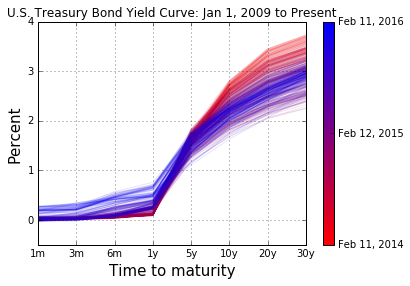

In [101]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = [0,1,2,3,4,5,6,7]
for n,dte in enumerate(yields.index):
    y = yields.loc[dte]#/np.mean(yields.loc[dte])
    ax.plot(x,y,'b-',alpha=0.1,color=cpick.to_rgba(n))
        
ax.grid()
ax.set_xlim([0,7])
ax.set_ylim([-0.5,4])
ax.set_xticks(range(8))
ax.set_yticks([0,1,2,3,4])
ax.set_xticklabels(['1m','3m','6m','1y','5y','10y','20y','30y'])
ax.set_yticklabels(['0','1','2','3','4'])

ax.set_title('U.S. Treasury Bond Yield Curve: Jan 1, 2009 to Present')
ax.set_xlabel('Time to maturity',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)


cbar = fig.colorbar(cpick,ticks = [0,int(N/2),N])
cbar.ax.set_yticklabels([yields.index[0].strftime(format='%b %d, %Y'),yields.index[int(N/2)].strftime(format='%b %d, %Y'),yields.index[-1].strftime(format='%b %d, %Y')])